# Titanic data analysis

## we have the data of titanic insident , we need to find out how many percentage of male and female are survive from that incident
  - here we have total 891 passenger id who traiveled in the taitanic 

# lets do

In [1]:
# import libary numpy and pandas
import numpy as np

import pandas as pd

In [2]:
# ignore warings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data set
data = pd.read_csv(r"C:\Users\sunil\Desktop\NIT- Data Science and AI Class\September\17th - ML\TITANIC PROJECT\DATASET\titanic dataset.csv")
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Data Cleaning

In [4]:
data.describe() # get the descritive statistics obout the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info() # informatioon about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Our target to find only how many male and female are surved
   - lets delet rest of the attribute from the dataset

In [6]:
# for analysis we dont have name, ticket, fare and cabin lets delet the attribute

In [7]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
del data['Name']

In [9]:
del data['Ticket']
del data['Fare']
del data['Cabin']

In [10]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C


In [11]:
# convert male as 1 and female as 0

In [12]:
def getvalue(str):
    if str == 'male':
        return 1
    else:
        return 0
data['Gender'] = data['Sex'].apply(getvalue)

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,0
2,3,1,3,female,26.0,0,0,S,0
3,4,1,1,female,35.0,1,0,S,0
4,5,0,3,male,35.0,0,0,S,1


In [13]:
# delet the sex attribute

In [14]:
del data['Sex']

In [15]:
data.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0


## Our final dataset is

In [16]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [17]:
data.dtypes # check all atribute datatypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Embarked        object
Gender           int64
dtype: object

In [18]:
data.isnull().sum() # summ allthe missing value by their atribute

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [19]:
# calculate the average age of survive passenger 
meanS = data[data.Survived==1].Age.mean()
meanS

28.343689655172415

In [20]:
# calculate the average age of not survive passenger
meanNS = data[data.Survived==0].Age.mean()
meanNS

30.62617924528302

In [21]:
# fill the age where passenger are survive
data.Age.fillna(meanS,inplace=True)

# fill the age where the passenger are not survive
data.Age.fillna(meanNS,inplace=False)

data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [22]:
# check the nullvalue in the dataset

In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Embarked       2
Gender         0
dtype: int64

In [24]:
## Lets check wheather the Embarked is affect to reach toour target

In [25]:
data[['Embarked','Survived']].value_counts() # valuecount

Embarked  Survived
S         0           427
          1           217
C         1            93
          0            75
Q         0            47
          1            30
Name: count, dtype: int64

In [26]:
# lets drop the missing value at embarked attribute
data.dropna(inplace=True)

In [27]:
data.isnull().sum() # check missing value

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Embarked       0
Gender         0
dtype: int64

## we done successfullly mising value tritment

In [28]:
## Lets rename some columns

In [29]:
# rename gender to sex
data.rename(columns={'Gender':'Sex'},inplace=True) 
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [30]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Embarked', 'Sex'],
      dtype='object')

In [31]:
# change embarked to numeric value  s==1,c==2,q==3
def getemb(str):
    if str == 'S':
        return 1
    elif str =='C':
        return 2
    else:
        return 3
data['Embarked']=data['Embarked'].apply(getemb)
        

In [32]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
0,1,0,3,22.0,1,0,1,1
1,2,1,1,38.0,1,0,2,0
2,3,1,3,26.0,0,0,1,0
3,4,1,1,35.0,1,0,1,0
4,5,0,3,35.0,0,0,1,1


In [33]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Embarked         int64
Sex              int64
dtype: object

In [34]:
data.rename(columns={'Embarked':'Embark'},inplace=True) # rename the embarked column name

In [35]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embark,Sex
0,1,0,3,22.0,1,0,1,1
1,2,1,1,38.0,1,0,2,0
2,3,1,3,26.0,0,0,1,0
3,4,1,1,35.0,1,0,1,0
4,5,0,3,35.0,0,0,1,1


In [36]:
data=data.rename(columns={'Survived':'Survive'}) # rename the survived to survive

In [37]:
data.head()

,PassengerId,Survive,Pclass,Age,SibSp,Parch,Embark,Sex
0,1,0,3,22.0,1,0,1,1
1,2,1,1,38.0,1,0,2,0
2,3,1,3,26.0,0,0,1,0
3,4,1,1,35.0,1,0,1,0
4,5,0,3,35.0,0,0,1,1


# we successfully done EDA

# Lets do Visualization

In [38]:
# import matplotllib library

In [39]:
import matplotlib.pyplot as plt
from matplotlib import style # style is an attribute of matplotlib module

In [40]:
#Count Total number of male from the data

In [41]:
male = (data['Sex']==1).sum()
print('Male numbers:-',male)

Male numbers:- 577


In [42]:
# Count total number of Female from the data

In [43]:
female = (data['Sex']==0).sum()
print('Female numbers:-',female)

Female numbers:- 312


In [44]:
# the number take into one list
p=[male,female]
p

[577, 312]

([<matplotlib.patches.Wedge at 0x133a40fe0c0>,
 [Text(-0.586705655416278, 1.1600760638434688, 'Male'),
  Text(0.4964432468906962, -0.9816028232521663, 'Female')],
 [Text(-0.3610496341023248, 0.7138929623652115, '64.90%'),
  Text(0.27078722557674334, -0.5354197217739088, '35.10%')])

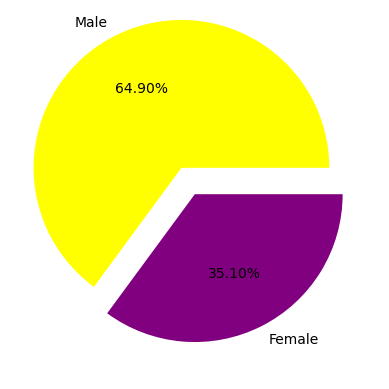

In [45]:
# draw piechart
plt.pie(p,labels=["Male",'Female'],colors=['yellow','purple'],explode=(0.2,0),autopct="%.2f%%")

In [46]:
# check totalnumber of male survive 

In [47]:
maleS=((data['Sex']==1)&(data['Survive']==1)).sum()
maleS

109

In [48]:
# check total number of male not survive

In [49]:
maleN=((data['Sex']==1)&(data['Survive']==0)).sum()
maleN

468

In [50]:
# check total number of female survive

In [51]:
femaleS=((data['Sex']==0) & (data['Survive']==1)).sum()

In [52]:
femaleS

231

In [53]:
# check total number of female not survive

In [54]:
femaleN=((data['Sex']==0) & (data['Survive']==0)).sum()
femaleN

81

In [55]:
# bring into one list to do pie chart
pc=[maleS,maleN,femaleS,femaleN]
pc

[109, 468, 231, 81]

([<matplotlib.patches.Wedge at 0x133a49a10a0>,
 [Text(1.0193999086759307, 0.4133083911457694, 'MaleSurvive'),
  Text(-0.9042435214866014, 0.7888876053339351, 'MaleNotSurvive'),
  Text(0.21718824283848098, -1.1801818788528882, 'femaleSurvive'),
  Text(1.1511740756789812, -0.33881890071931253, 'FemaleNotSurvive')],
 [Text(0.5560363138232348, 0.22544094062496509, '12.26%'),
  Text(-0.5274753875338507, 0.4601844364447954, '52.64%'),
  Text(0.12669314165578055, -0.6884394293308514, '25.98%'),
  Text(0.6715182108127391, -0.1976443587529323, '9.11%')])

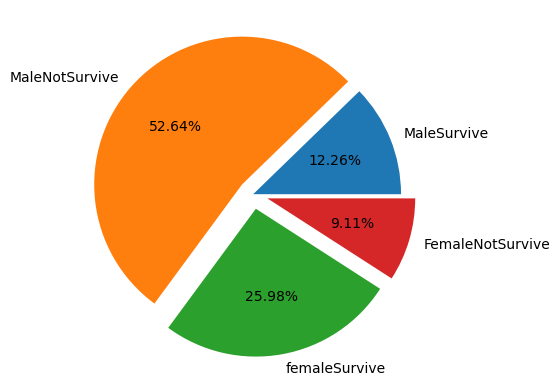

In [56]:
#plot piechart
plt.pie(pc,autopct="%.2f%%",explode=(0,0.1,0.1,0.1),labels=['MaleSurvive','MaleNotSurvive','femaleSurvive','FemaleNotSurvive'])

# completed

In [ ]:
## At the end we conclode that from all the passenger travel in the taitanic
  - Most of the male are not able to survive around 52.64%
  - A